In [1]:
# Import packages and functions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load dataset
PATH = "/Users/depalma/Desktop/CPSC222/A-Data/"
fin = "BostonHousing.csv"
fin = PATH + fin
BH = pd.read_csv(fin)
#BH

In [3]:
#Clean Data
print(BH.shape)
BH = BH.dropna()
print(BH.shape)

#Make sure relevant columns are numreric
from pandas.api.types import is_numeric_dtype

if is_numeric_dtype(BH['RM']):
   print('ok')
if is_numeric_dtype(BH['LSTAT']):
   print('ok')


(506, 14)
(394, 14)
ok
ok


In [4]:
# Store relevant columns as variables
data = BH[['LSTAT','RM']].values.reshape(-1, 2) #1 X 2
#Notice no predicted value
#print(data[:5])   # First 5 samples of features
#Scale/Normalize
#Why? If LSTAT is 0–40 and RM is 3–9, LSTAT will dominate distance calculations
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)



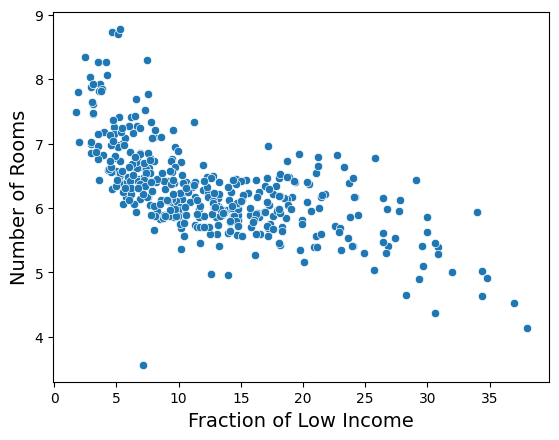

In [5]:
# Visual exploration
p = sns.scatterplot(data=BH, x='LSTAT', y='RM')
p.set_xlabel('Fraction of Low Income', fontsize=14);
p.set_ylabel('Number of Rooms', fontsize=14);

In [6]:
# Initialize a k-means object with 3 clusters
K = 3
kmModel = KMeans(n_clusters=K)

# Run the k-means algorithm
#Assign every house to a cluster (0,1,2), compute the cluster centroiss (means) of each cluster
kmModel = kmModel.fit(data_scaled)

# Retrieve cluster centroids.  This is a numpy array: 3X2, 3 centroids (1 per cluster) X,Y coordinates of each which are LSTAT,RM
centroids_scaled = kmModel.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled) #to be used in the plot below
#Display final centroids, 1 for each 
#Just for clarification:
#centroids =
#[
#        [0,0]                        [0,1]
#  [ LSTAT_center_of_cluster0 , RM_center_of_cluster0 ],
#         [1,0]                       [1,1]
#  [ LSTAT_center_of_cluster1 , RM_center_of_cluster1 ],
#         [2,0]                       [2,1]
#  [ LSTAT_center_of_cluster2 , RM_center_of_cluster2 ]
#]
print("Centroids in original (unscaled) units")
for i in range(K):
    print(f"Cluster {i} {centroids[i]}")

Centroids in original (unscaled) units
Cluster 0 [6.10157534 6.89767808]
Cluster 1 [26.35892857  5.59594643]
Cluster 2 [13.87552083  6.00985417]


In [7]:
# Save the cluster assignments all instances
clusters = kmModel.fit_predict(data_scaled)

# View the clusters for the first five instances.  That is, of the three clusters which do the first five instances land in
#clusters[0:5]

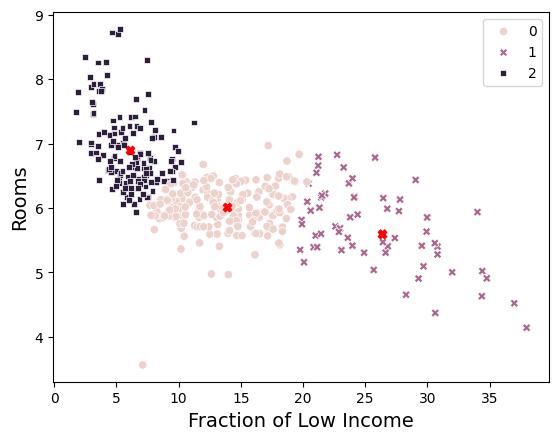

In [11]:
# Plot clusters

#Not scaled.  Scaled data is for the algorithm. the scatterplot is for interpretation
p = sns.scatterplot(
    data=BH, x='LSTAT', y='RM', hue=clusters, style=clusters
)
p.set_xlabel('Fraction of Low Income', fontsize=14);
p.set_ylabel('Rooms', fontsize=14);

# Add centroid for cluster 0.  See above 
plt.scatter(x=centroids[0, 0], y=centroids[0, 1], c='red', marker='X') #see above, the first centroid

# Add centroid for cluster 1
plt.scatter(x=centroids[1, 0], y=centroids[1, 1], c='red', marker='X') #the second centroid

# Add centroid for cluster 2
plt.scatter(x=centroids[2, 0], y=centroids[2, 1], c='red',marker='X')  #the third centroid



In [12]:
# Fit k-means clustering with k=1,...,5 and save WCSS for each
WCSS = []
k = [1, 2, 3, 4, 5]
for j in k:
    kmModel = KMeans(n_clusters=j)
    kmModel = kmModel.fit(BH)
    WCSS.append(kmModel.inertia_)

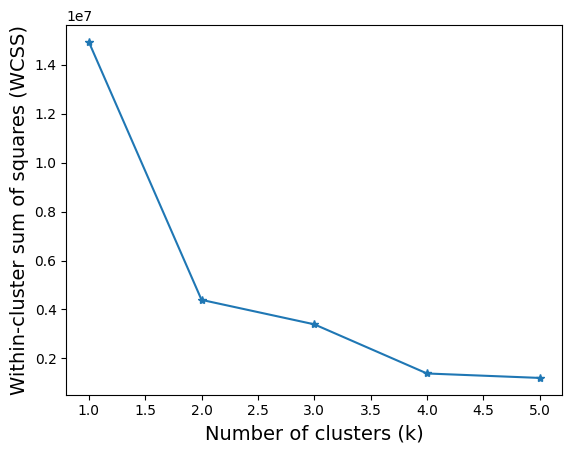

In [13]:
# Plot the WCSS for each cluster
ax = plt.figure().gca()
plt.plot(k, WCSS, '*-')
plt.xlabel('Number of clusters (k)', fontsize=14);
plt.ylabel('Within-cluster sum of squares (WCSS)', fontsize=14);